# Regression

Regression is a supervised learning task similar to classification. The major distinction between the two is that regression is (in most cases) used to predict a target variable which is continuous. An example problem would be of trying to predict the real estate price of a house based on features like the number of bathrooms, the distance from the highway e.t.c. This notebook focuses both on how to use premade models that will automatically find the values of the parameters, and on how to create implementations of algorithms that you can create as the user to find out how the models work under the hood.

In this notebook the following topics will be covered: -

1. Linear Regression
2. Gradient Descent
3. Polynomial Regression
4. Learning Curves
5. Regularised Linear Models
6. Logistic Regression


## 1. Linear Regression

A simple linear regression problem is very easy to understand. As stated earlier, regression is used to predict target values which are continuous. For example predicting the value of a house.

A linear model makes a prediction simply by computing a weighted sum of the input features, in addition to a bias term (called an intercept). A linear model hence has the same equation of that of the slope of the line equation (y = mx + c). This is because the logic of a linear model is to create a line that best fits the data, i.e. straight line that goes through most of the data.

$\hat{y} = \theta_{0}  + \theta_{1}x_{1} + \theta_{2}x_{2} + .. + \theta_{n}x_{n}$

In this equation:
* $\hat{y}$ is the predicted value
* n is the number of features
* $x_{i}$ is the ith feature variable
* $\theta_{j}$ is the jth model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}, \theta_{2}$...)

This can be written in a much simpler fashion using vectorized form:

$\hat{y} = h_{\theta}(x) = \theta.x$

In this equation:

* $\theta$ is the models parameter vector containing the bias term $\theta_{0}$ and the feature vectors $\theta_{1}$ to $\theta_{n}$
* $x$ is the instance features vector containing $x_{0}$ to $x_{n}$ with $x_{0}$ always equal to 1.
* $\theta.x$ is the dot product of vectors \theta and x which is of course equal to $\theta_{0}x_{0}  + \theta_{1}x_{1} + \theta_{2}x_{2} + .. + \theta_{n}x_{n}$
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$


This is the lineaar regression model. TO train it we set its parameters so that the model best fits the training set. We need a measure of how well the model performs so that we can tell whether it is improving or not. For lassification we used metrics like Accuracy, F1, Precision, Recall ..., for Regression we will be using errors like MSE (mean squared error), RMSE (root mean squared error) e.t.c. TO train a Linear Regression Model we need to find te value of $\theta$ that minimises the RMSE. It is actually simpler to minimise the MSE than the RMSE and it leads to the same result. MSE is calculated in the following manner.

$MSE (X, h_{\theta}$) =  $\frac{1}{m}$ * $\sum \limits _{i=1} ^ {m}$ ($\theta^T {x^i} - {y^i})^2$

To simply understand it, MSE is where we first find the error for each entry that is every y_true - y_pred, we then square this error and find the mean of these errors.

### 1.1 Normal Equation

To find the value of $\theta$ that minimises the cost function there is a closed form solution - in other words, a mathematical equation that gives the result directly. This is called a normal equation.

$h_{\theta} = {({X^T}X)^{-1}} X^T y$

Eq:
* $\hat{\theta}$ is the value of $\theta$ that minimises the cost function
* $y$ is the vector of target values containing $y_{1}$ to $y_{m}$

To test this equation we will generate some linear looking data:

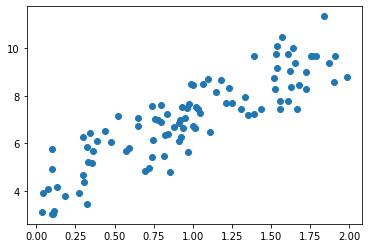

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)

Now we will compute $\hat{\theta}$ using the Normal equation. We will use inv() function from NumPy linear algerba model to compute the inverse of matrix, and the dot method for matrix multiplication.

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x_{1} +$ Gaussian noise.

In [6]:
theta_best

array([[4.085735  ],
       [3.00463807]])

As seen above the model did not find the exact values instead it came quite close. In an ideal scenario we would have gotten values as 4 and 3. The reason we couldnt find it exactly was because of the noise.

Now to make predictions using $\hat{\theta}$:

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adds x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.085735  ],
       [10.09501114]])

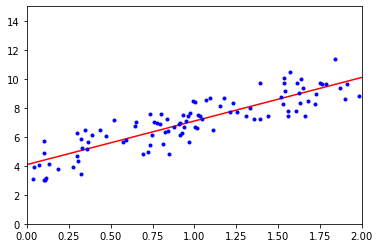

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([4.085735]), array([[3.00463807]]))

Model also approximated almost the same values

In [12]:
model.predict(X_new)

array([[ 4.085735  ],
       [10.09501114]])

The linear regression callss is based on scipy.linalg.lstsq() which stands for least squares (that is the method used to find param values)

### 1.2 Computation Complexity

The normal equation computes the inverse of $X^TX$ which is an (n + 1) x (n + 1) matrix (where n is the number of featyres). The computational complexity of inverting such a matrix is $O(n^{2.4})$ to $O(n^{3})$, depending on the implementation. In other words if you double the number of features you multiply the computational time by $2^2.4 = 5.3$ to $2^3 = 8$

The SVD approach used by sklearn LinearRegression class is about $On^{2}$. If you double the number of features you multiply the computational time by roughly 4.

Both normal and SVD get slow as features grow large. But on a poitive side both are linear with regard to the number of instances in the training set (O(m)) so they handle large training sets efficiently provided they can fit in memory.

Once the model is trained, predictions are very fast, predictions on twice as many instances or features will takes twice as much time.

We will now learn how to train a Linear Regression model which is better suited for cases where there are a large number of features or too many training instances to fit in memory.


## 2. Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimum solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

As an example if you are at the top of a hill and it is surrounded by fog and you can only feel the slope of the ground under your feet, you will keep walking downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regard to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero you have reached a minimum.

Concretely you start by filling $\theta$ with random values (called random intialisation). Then you improve it gradually taking one step at a time each attempting to decrease the cost function until the algorithm converges to a minimum.

<br>
<center><img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." alt="Gradient Descent" width=300></center>
<br>

An important parameter in Gradient Descent is the size of the steps, determing by the **learning rate** parameter. If learning rate is too small, the algorithm will have to go through several iterations to converge which will take a long time. On the other hand if the learning rate is too high, you might jump cross the valley and end up even higher than before. This might make the algorithm diverge with larger and larger values failing to find a good solution

<br>
<center><img src="https://i.stack.imgur.com/au77i.png" alt="Gradient Descent" width=300></center>
<br>

Not all cost functions look like regular bowls as seen above instead there may be holes, ridges, plateaus and all sorts of irregularities which makes convergence to minimum difficult. Sometimes you could end up findind the local minimum which is not the same as the global minimum and you could also end up stopping thw iterative process before finding the global minimum.

<br>
<center><img src="https://www.i2tutorials.com/wp-content/media/2019/09/Neural-network-32-i2tutorials.png" alt="Gradient Descent" width=300></center>
<br>

